In [1]:
import cv2 
from PIL import Image 
import matplotlib.pyplot as plt 
import numpy as np 

In [3]:
from utils import visualize 
import pickle 
with open("./data.pkl", 'rb') as f: 
    dataset = pickle.load(f)

In [4]:
data_ab = dataset["4cells"] # list of list of numpy matrices 

In [5]:
data_cde = dataset["9cells"] 

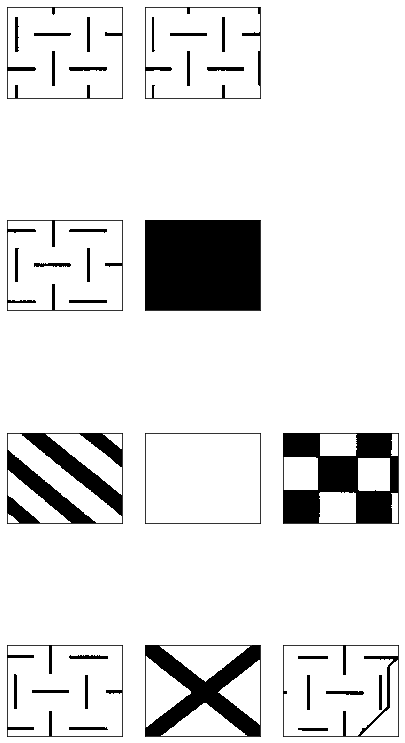

In [6]:
visualize(data_ab[0])

23.0


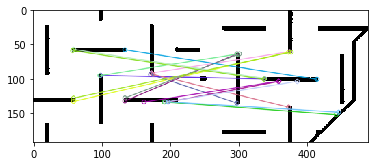

(<matplotlib.image.AxesImage at 0x129b2abe0>, None)

In [7]:
# Brute-Force Matching with ORB Descriptors 
img1 = data_ab[0][0]
img2 = data_ab[0][9]
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)


# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
print(sum([matches[i].distance for i in range(10)]))
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

In [8]:
print(type(kp1))
print(type(des1))

<class 'list'>
<class 'numpy.ndarray'>


In [9]:
print(len(kp1)) 
print(type(kp1[0]))

44
<class 'cv2.KeyPoint'>


In [10]:
print(kp1)

[<KeyPoint 0x10409a750>, <KeyPoint 0x10409a690>, <KeyPoint 0x10409a360>, <KeyPoint 0x1221bc510>, <KeyPoint 0x1221bc300>, <KeyPoint 0x1221bc030>, <KeyPoint 0x1221bc360>, <KeyPoint 0x1221bc090>, <KeyPoint 0x1221bc0f0>, <KeyPoint 0x1221bc450>, <KeyPoint 0x1221bc420>, <KeyPoint 0x1221bc0c0>, <KeyPoint 0x1221bc4e0>, <KeyPoint 0x1221bc480>, <KeyPoint 0x1221bc540>, <KeyPoint 0x1221bc600>, <KeyPoint 0x1221bc5d0>, <KeyPoint 0x1221bc5a0>, <KeyPoint 0x1221bc570>, <KeyPoint 0x1221bc630>, <KeyPoint 0x1221bc690>, <KeyPoint 0x1221bc660>, <KeyPoint 0x1221bc750>, <KeyPoint 0x1221bc720>, <KeyPoint 0x1221bc6f0>, <KeyPoint 0x1221bc6c0>, <KeyPoint 0x1221bc780>, <KeyPoint 0x1221bc7b0>, <KeyPoint 0x1221bc7e0>, <KeyPoint 0x1221bc810>, <KeyPoint 0x1221bc840>, <KeyPoint 0x1221bc870>, <KeyPoint 0x1221bc8a0>, <KeyPoint 0x1221bc8d0>, <KeyPoint 0x1221bc900>, <KeyPoint 0x1221bc930>, <KeyPoint 0x1221bc960>, <KeyPoint 0x1221bc990>, <KeyPoint 0x1221bc9c0>, <KeyPoint 0x1221bc9f0>, <KeyPoint 0x1221bca20>, <KeyPoint 0x122

In [11]:
print(des1.shape)

(44, 32)


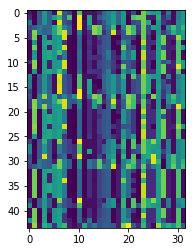

(<matplotlib.image.AxesImage at 0x129c36240>, None)

In [12]:
plt.imshow(des1), plt.show()

In [13]:
print(img1.shape)

(193, 245)


In [14]:
print(type(matches))
print(len(matches))

<class 'list'>
17


In [15]:
print(type(matches[0]))

<class 'cv2.DMatch'>


In [16]:
print(matches[0])

<DMatch 0x12627bed0>


In [17]:
print(matches[10].distance)

4.0


12


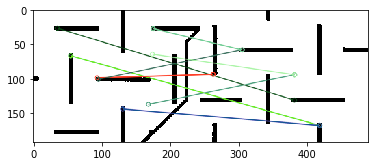

(<matplotlib.image.AxesImage at 0x123d93be0>, None)

In [31]:
img1 = data_ab[0][9]
img2 = data_ab[0][0] 
# Initiate SIFT detector 
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
print(len(good))
# 0 29 / 1 9 / 2 11 / 3 0 / 4 0 / 5 0 / 6 0 / 7 17 / 8 0 / 9 12 / 

# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

0


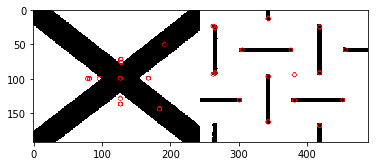

(<matplotlib.image.AxesImage at 0x12c77fc50>, None)

In [67]:
img1 = data_ab[0][8]
img2 = data_ab[0][0] 
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
total_distance = 0 

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
        total_distance += m.distance
print(total_distance)
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()

In [69]:
def L2matcher(matA, matB): # input mat with two dim( not three ) binary 0/255 
    assert len(matA.shape) == 2 and len(matB.shape) == 2 and type(matA[0,0]) == np.uint8 
    matA = matA/255 # actually, in this case L1 and L2 doesn't make any difference 
    matB = matB/255 
    Ah, Aw = matA.shape 
    Bh, Bw = matB.shape 
    Ch, Cw = Ah + Bh, Aw + Bw 
    assert Ch > Bh and Cw > Bw
    matC = -np.ones((Ch,Cw),dtype=np.uint8) 
    matCA = matC.copy()
    matCA[int(Bh/2):int(Bh/2)+Ah, int(Bw/2):int(Bw/2)+Aw] = matA 
    smallest_dist = np.inf 
    
    for i in range(0,Ah):
        for j in range(0,Aw):
            matCB = matC.copy()
            matCB[i:i+Bh,j:j+Bw] = matB 
            dist = 0 
            for ii in range(0,Ch):
                for jj in range(0,Cw): 
                    val_a, val_b = matCA[ii,jj], matCB[ii,jj] 
                    if val_a != -1 and val_b != -1:
                        dist += np.sum(np.abs(matCA - matCB))
            if dist < smallest_dist: 
                smallest_dist = dist 
    return smallest_dist 
print(L2matcher(data_ab[0][0],data_ab[0][1]))               
            
            
            

KeyboardInterrupt: 

In [84]:
def FLANNMatcher(img1, img2):
    # Initiate SIFT detector
    sift = cv2.xfeatures2d.SIFT_create()
    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)
    # FLANN parameters
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=50)   # or pass empty dictionary
    flann = cv2.FlannBasedMatcher(index_params,search_params)
    matches = flann.knnMatch(des1,des2,k=2)
    total_distance = 0 

    # Need to draw only good matches, so create a mask
    matchesMask = [[0,0] for i in range(len(matches))]
    # ratio test as per Lowe's paper
    for i,(m,n) in enumerate(matches):
        if m.distance < 0.7*n.distance:
            matchesMask[i]=[1,0]
            total_distance += m.distance
    
#     draw_params = dict(matchColor = (0,255,0),
#                        singlePointColor = (255,0,0),
#                        matchesMask = matchesMask,
#                        flags = cv2.DrawMatchesFlags_DEFAULT)
#     img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
#     plt.imshow(img3,),plt.show()
    return total_distance


imgIdx = 7
for i in range(10): 
    try: 
        print(FLANNMatcher(data_ab[imgIdx][0], data_ab[imgIdx][i])) 
    except: 
        print("unable") 
    












0.0
24.26932144165039
171.5537567138672
unable
126.71025466918945
230.4145164489746
377.7129669189453
40.767635345458984
156.62132835388184
208.82102584838867


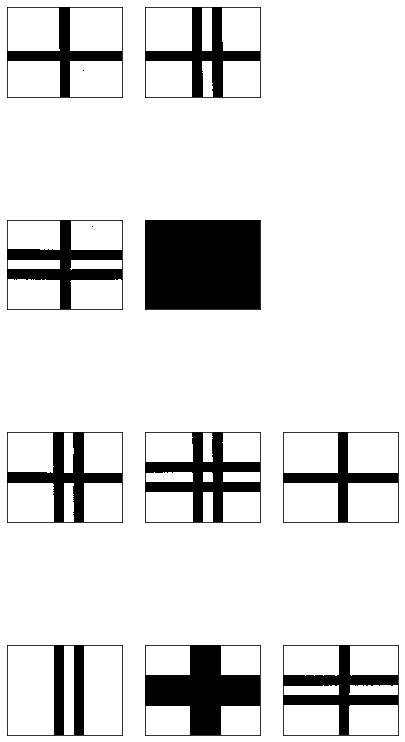

In [85]:
visualize(data_ab[imgIdx])